In [15]:
import jax
import jax.numpy as jnp
import json

import matplotlib.pyplot as plt

In [33]:
# runs = range(10655899, 10655910)
# for run in runs:
#   with open(f"output/runs/{run}/metrics.json", "r") as f:
#       metrics = json.load(f)
#       plt.plot(metrics["our_regret"], label="Our Regret")
#       plt.plot(metrics["ts_regret"], label="TS Regret")
#       plt.legend()
#       plt.title(run)
#       plt.show()

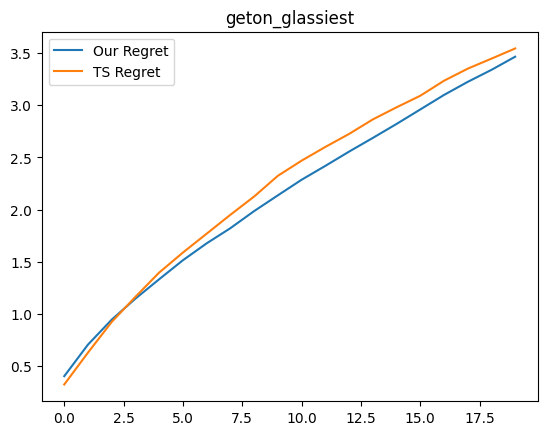

In [35]:
with open(f"output/runs/contrapunto_disnaturalize/metrics.json", "r") as f:
      metrics = json.load(f)
      plt.plot(metrics["our_regret"], label="Our Regret")
      plt.plot(metrics["ts_regret"], label="TS Regret")
      plt.legend()
      plt.title(run)
      plt.show()